# 原始数据可视化

In [12]:
from sqlalchemy import create_engine
from config import MySQLConfig
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# 连接到 MySQL
db = MySQLConfig()
engine_str = f"mysql+pymysql://{db.user}:{db.password}@{db.host}:{db.port}/{db.database}?charset={db.charset}"
engine = create_engine(engine_str)

print("MySQL连接成功")


# 执行 SQL 查询并加载数据
query = """SELECT * FROM DeliverInsight.customer"""
df = pd.read_sql(query, engine)

# 显示数据的前几行
print(df.head(3))

MySQL连接成功
   客户账号    运单数     业务量     体积    计费重量  重泡标识  主要始发站  主要终点站  开始城市  终点城市  服务类型  \
0     1  344.0  6880.0  27.52  6880.0     1      0     58     1   449     1   
1     2  420.0  8400.0  33.60  8400.0     1      0     54     1   427     1   
2     3   65.0  1300.0   5.20  1300.0     1      0     58     1   449     1   

   结算方式  收益站      收益 近期合作月份_time 近期合作日期_time  创收站  流失情况  
0     1    0  3199.2  2015-10-01  2015-10-15    1     0  
1     1    0  3738.0  2015-10-01  2015-10-09    1     0  
2     1    0   604.5  2015-10-01  2015-10-12    1     0  


## 数据可视化

### a. 数据基本信息


=========== 中位数（Median） ===========
客户账号     20569.500
运单数        128.000
业务量       1515.000
体积           7.670
计费重量      2179.675
重泡标识         0.000
主要始发站       28.000
主要终点站       28.000
开始城市        29.000
终点城市       203.500
服务类型         1.000
结算方式         1.000
收益站         35.000
收益        1676.700
创收站         43.000
流失情况         0.000
dtype: float64


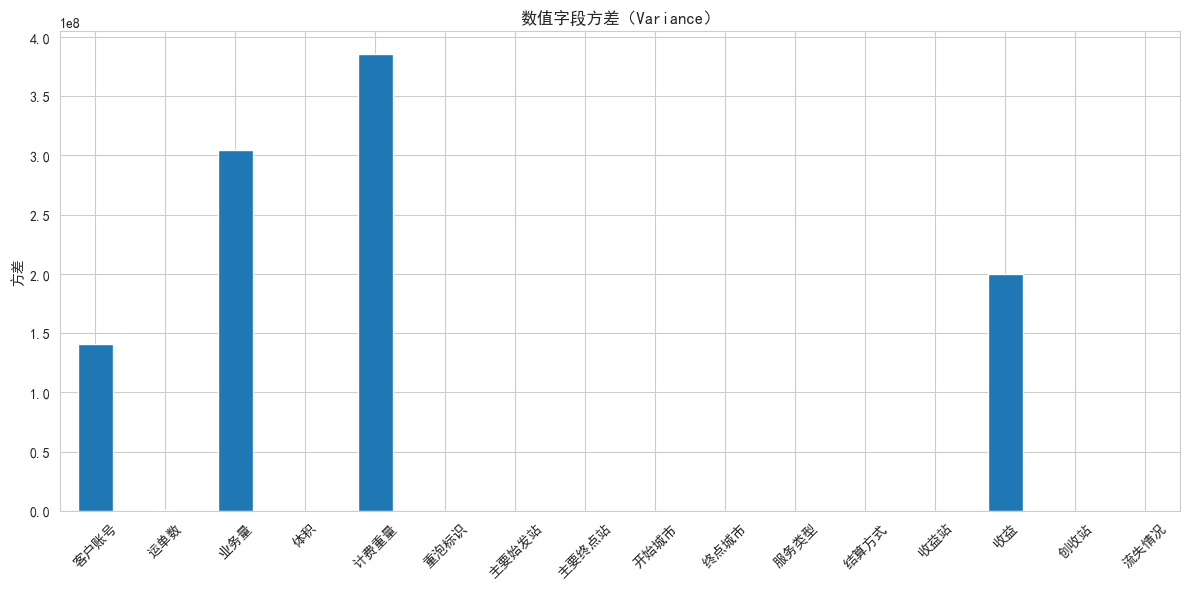


=========== 方差（Variance） ===========
客户账号     1.410313e+08
运单数      1.023682e+06
业务量      3.050123e+08
体积       4.071268e+03
计费重量     3.854008e+08
重泡标识     2.313291e-01
主要始发站    3.753445e+02
主要终点站    3.054081e+02
开始城市     8.254351e+02
终点城市     1.814252e+04
服务类型     4.589209e-01
结算方式     2.850691e-02
收益站      8.979638e+02
收益       2.002710e+08
创收站      1.117096e+03
流失情况     4.431861e-02
dtype: float64


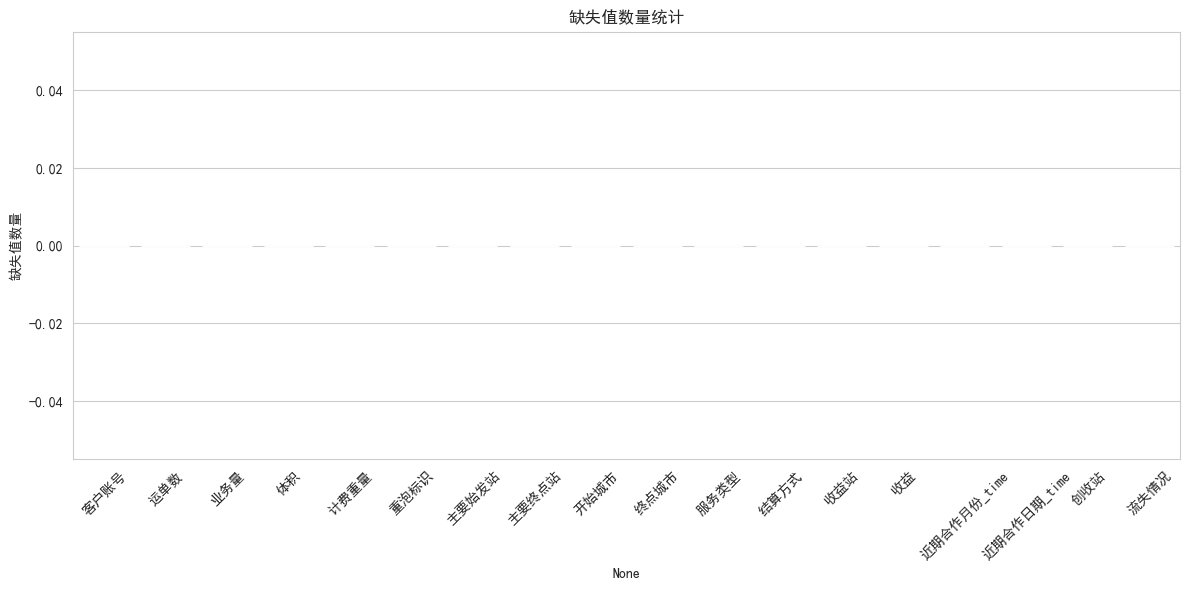

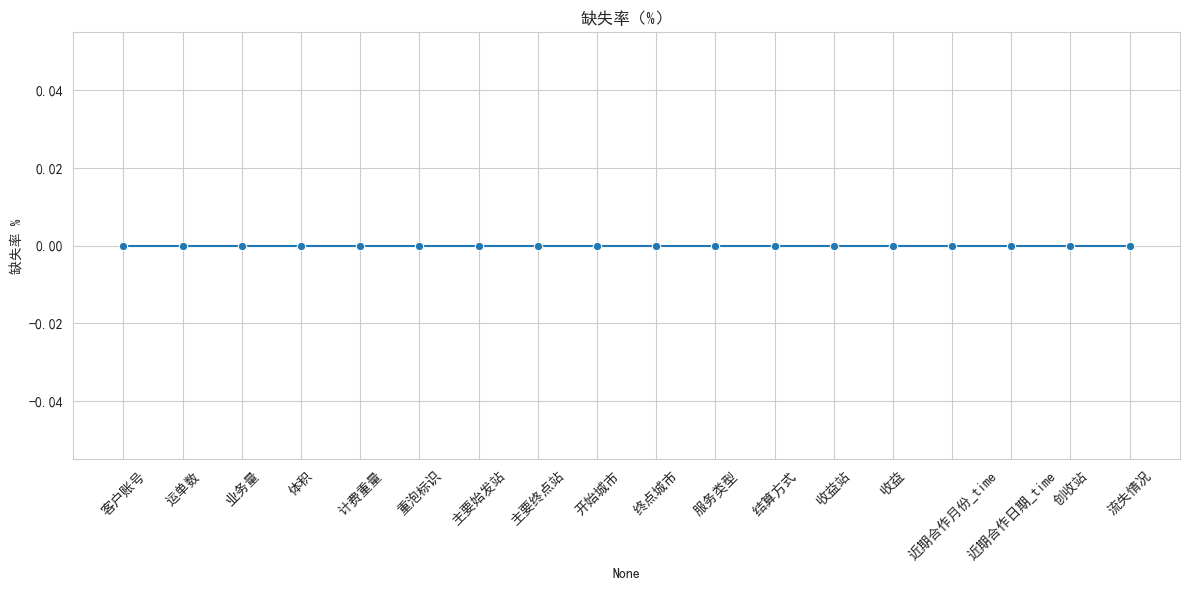


=========== 缺失值统计 ===========
客户账号           0
运单数            0
业务量            0
体积             0
计费重量           0
重泡标识           0
主要始发站          0
主要终点站          0
开始城市           0
终点城市           0
服务类型           0
结算方式           0
收益站            0
收益             0
近期合作月份_time    0
近期合作日期_time    0
创收站            0
流失情况           0
dtype: int64

=========== 缺失率（百分比） ===========
客户账号           0.0
运单数            0.0
业务量            0.0
体积             0.0
计费重量           0.0
重泡标识           0.0
主要始发站          0.0
主要终点站          0.0
开始城市           0.0
终点城市           0.0
服务类型           0.0
结算方式           0.0
收益站            0.0
收益             0.0
近期合作月份_time    0.0
近期合作日期_time    0.0
创收站            0.0
流失情况           0.0
dtype: float64


In [2]:
# ======== 中位数 ========
median_values = df.median(numeric_only=True)
print("\n=========== 中位数（Median） ===========")
print(median_values)


# ======== 方差 ========
var_values = df.var(numeric_only=True)

plt.figure(figsize=(12, 6))
var_values.plot(kind='bar')
plt.title('数值字段方差（Variance）')
plt.ylabel('方差')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n=========== 方差（Variance） ===========")
print(var_values)

# ======== 缺失值统计 ========
missing_count = df.isna().sum()
missing_rate = df.isna().mean() * 100

# 绘图
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_count.index, y=missing_count.values)
plt.title('缺失值数量统计')
plt.ylabel('缺失值数量')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=missing_rate.index, y=missing_rate.values, marker='o')
plt.title('缺失率（%）')
plt.ylabel('缺失率 %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n=========== 缺失值统计 ===========")
print(missing_count)

print("\n=========== 缺失率（百分比） ===========")
print(missing_rate)

### b. 随时间变化的收益折线图

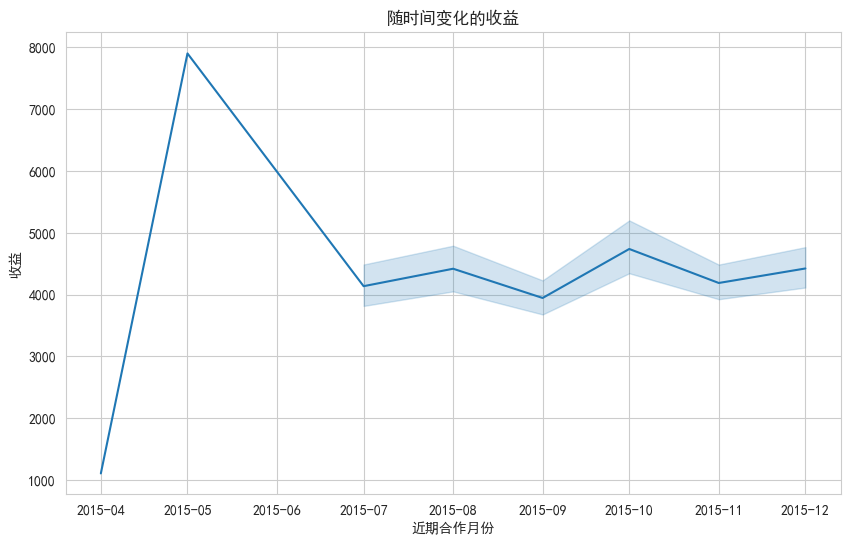

In [3]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='近期合作月份_time', y='收益', data=df)
plt.title('随时间变化的收益')
plt.xlabel('近期合作月份')
plt.ylabel('收益')
plt.show()

### c. 运单数分布的直方图

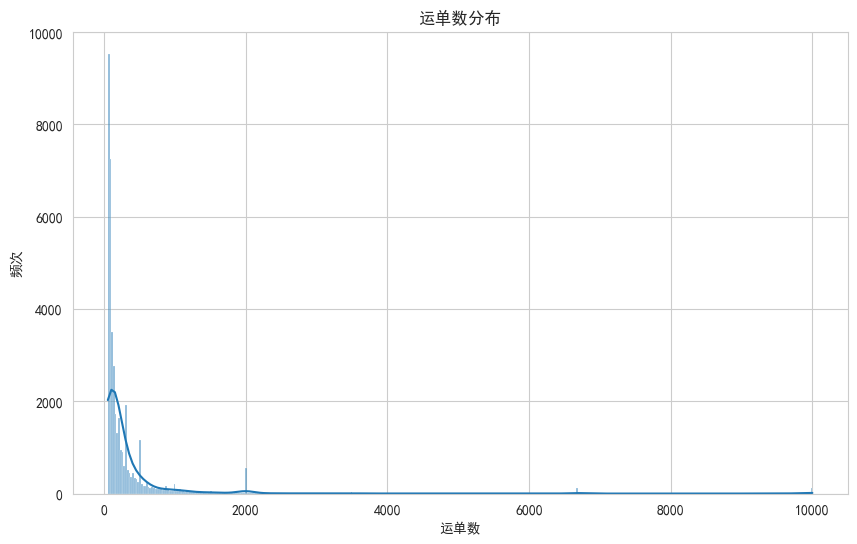

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['运单数'], kde=True)
plt.title('运单数分布')
plt.xlabel('运单数')
plt.ylabel('频次')
plt.show()

### d. 业务量与体积的散点图

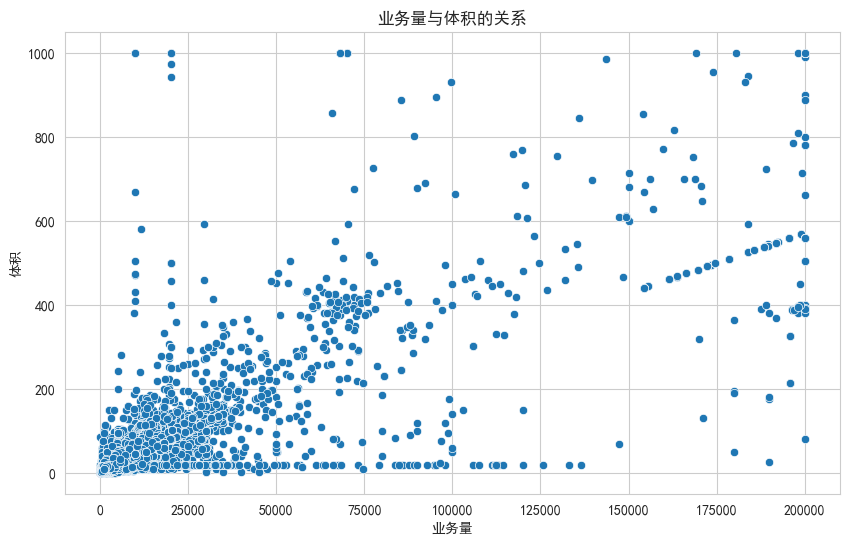

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='业务量', y='体积', data=df)
plt.title('业务量与体积的关系')
plt.xlabel('业务量')
plt.ylabel('体积')
plt.show()

### e. 流失情况与收益的箱线图

C:\Users\wshuo\.conda\envs\Python312venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wshuo\.conda\envs\Python312venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wshuo\.conda\envs\Python312venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24773 (\N{CJK UNIFIED IDEOGRAPH-60C5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wshuo\.conda\envs\Python312venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20917 (\N{CJK UNIFIED IDEOGRAPH-51B5}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\wshuo\.conda\envs\Python312venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK 

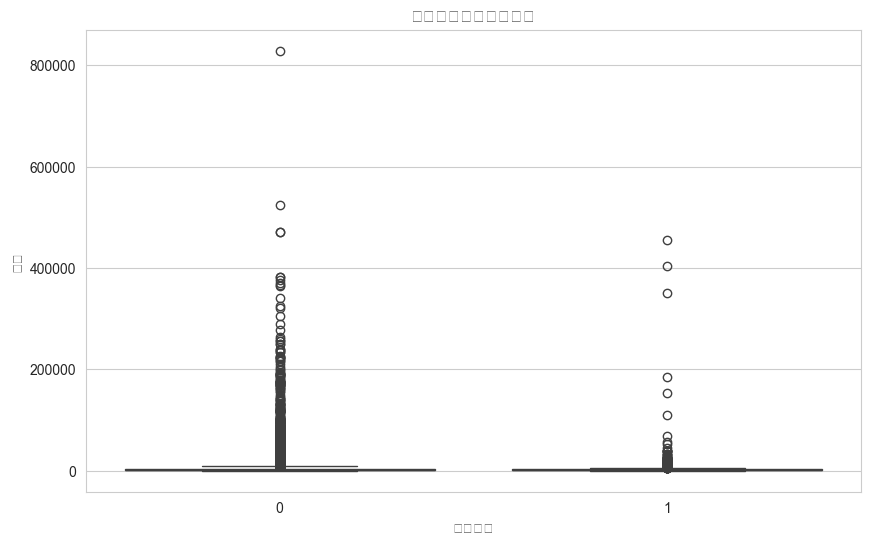

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='流失情况', y='收益', data=df)
plt.title('流失情况与收益的关系')
plt.xlabel('流失情况')
plt.ylabel('收益')
plt.show()

### f. 相关性热图

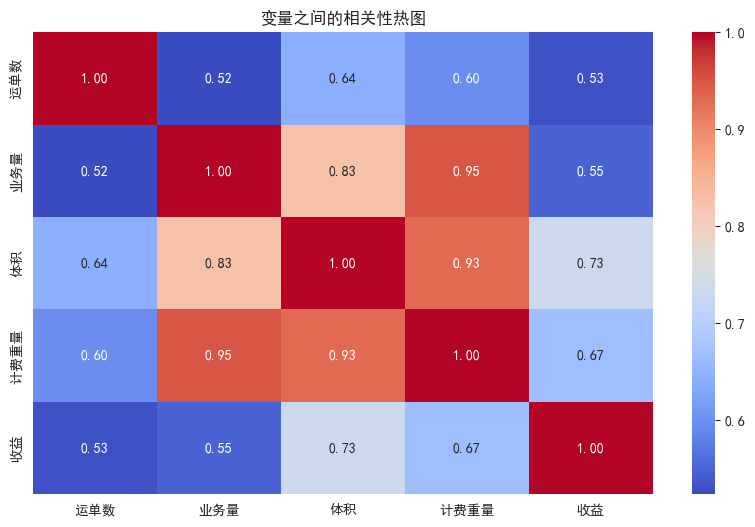

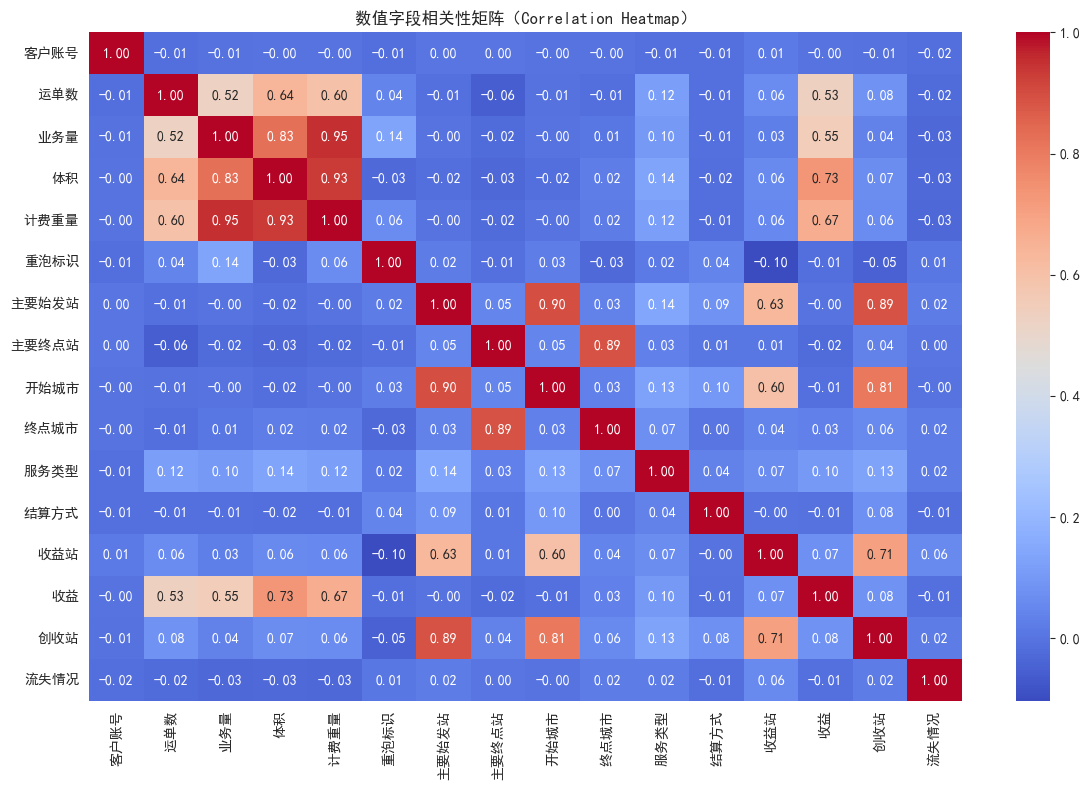


=========== 数值字段的相关性 ===========
           客户账号       运单数       业务量        体积      计费重量      重泡标识     主要始发站  \
客户账号   1.000000 -0.013685 -0.005143 -0.002032 -0.003350 -0.013308  0.001721   
运单数   -0.013685  1.000000  0.524073  0.641897  0.597583  0.039332 -0.008739   
业务量   -0.005143  0.524073  1.000000  0.825299  0.948595  0.137458 -0.002798   
体积    -0.002032  0.641897  0.825299  1.000000  0.932424 -0.026017 -0.016836   
计费重量  -0.003350  0.597583  0.948595  0.932424  1.000000  0.064359 -0.002326   
重泡标识  -0.013308  0.039332  0.137458 -0.026017  0.064359  1.000000  0.020259   
主要始发站  0.001721 -0.008739 -0.002798 -0.016836 -0.002326  0.020259  1.000000   
主要终点站  0.002249 -0.058042 -0.021949 -0.031592 -0.023639 -0.011717  0.045043   
开始城市  -0.000352 -0.006671 -0.004060 -0.015857 -0.001386  0.025743  0.899000   
终点城市  -0.002185 -0.014350  0.007235  0.024344  0.018058 -0.026601  0.034647   
服务类型  -0.009219  0.120376  0.100870  0.137876  0.119924  0.017039  0.142167   
结算方式  -0.010450 -0

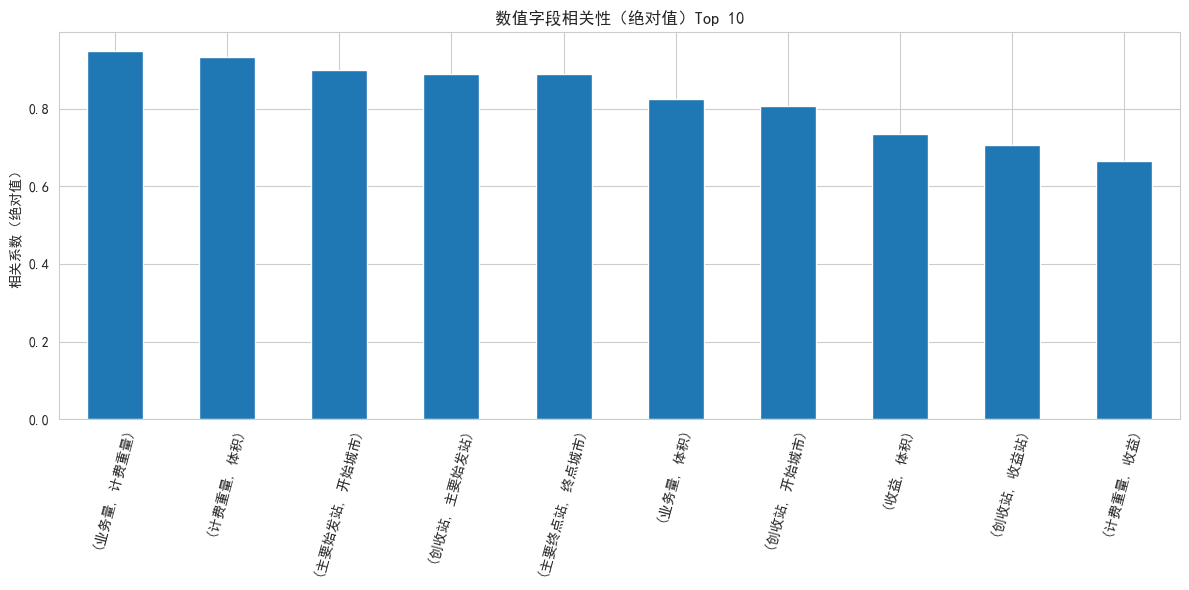


=========== 相关性（按绝对值排序 Top 10） ===========
业务量    计费重量     0.948595
计费重量   体积       0.932424
主要始发站  开始城市     0.899000
创收站    主要始发站    0.890236
主要终点站  终点城市     0.888787
业务量    体积       0.825299
创收站    开始城市     0.807420
收益     体积       0.733757
创收站    收益站      0.706805
计费重量   收益       0.666142
dtype: float64


In [7]:
# 选择需要计算相关性的列
corr = df[['运单数', '业务量', '体积', '计费重量', '收益']].corr()

# 绘制相关性热图
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('变量之间的相关性热图')
plt.show()


# ======== 相关性矩阵 ========
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('数值字段相关性矩阵（Correlation Heatmap）')
plt.tight_layout()
plt.show()

print("\n=========== 数值字段的相关性 ===========")
print(corr)


# ======== 相关性 Top10 ========
corr_abs = corr.abs()
corr_sorted = corr_abs.unstack().sort_values(ascending=False)
corr_sorted = corr_sorted[corr_sorted < 1].drop_duplicates()
top10 = corr_sorted.head(10)

# 绘图
plt.figure(figsize=(12, 6))
top10.plot(kind='bar')
plt.title('数值字段相关性（绝对值）Top 10')
plt.ylabel('相关系数（绝对值）')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

print("\n=========== 相关性（按绝对值排序 Top 10） ===========")
print(top10)



### g.各个城市的收益分布

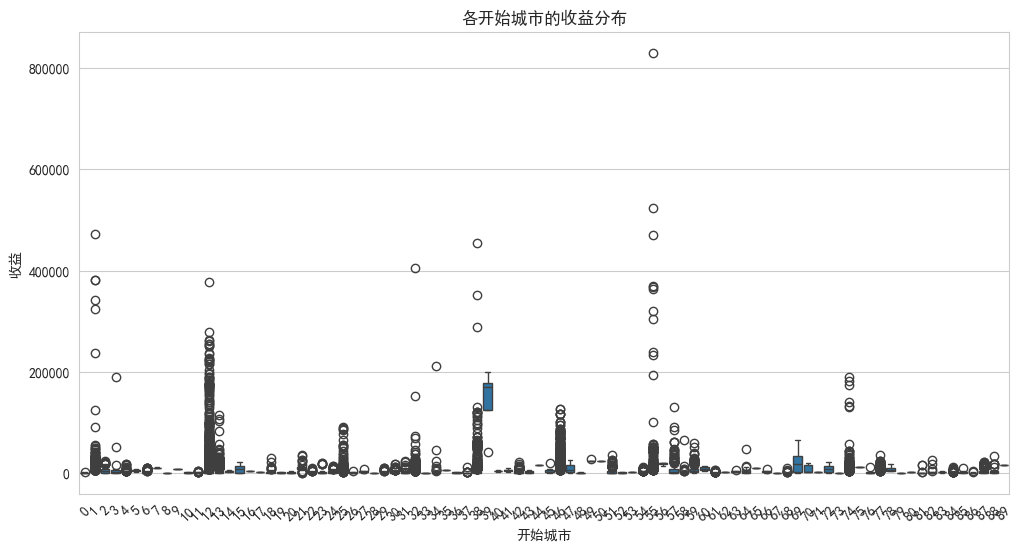

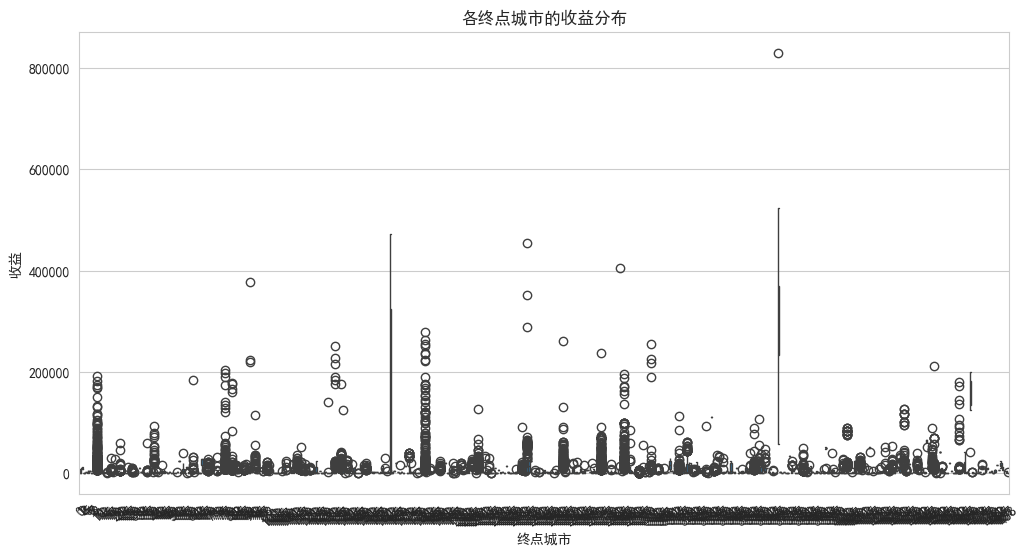

In [8]:
# 按开始城市展示收益分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='开始城市', y='收益', data=df)
plt.title('各开始城市的收益分布')
plt.xlabel('开始城市')
plt.ylabel('收益')
plt.xticks(rotation=45)
plt.show()

# 按终点城市展示收益分布
plt.figure(figsize=(12, 6))
sns.boxplot(x='终点城市', y='收益', data=df)
plt.title('各终点城市的收益分布')
plt.xlabel('终点城市')
plt.ylabel('收益')
plt.xticks(rotation=45)
plt.show()


### h.流失情况与其他变量的关系

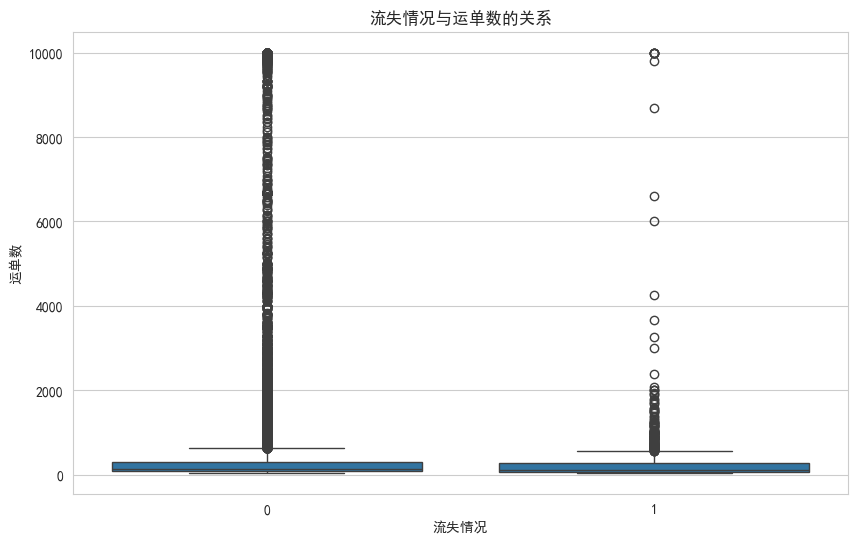

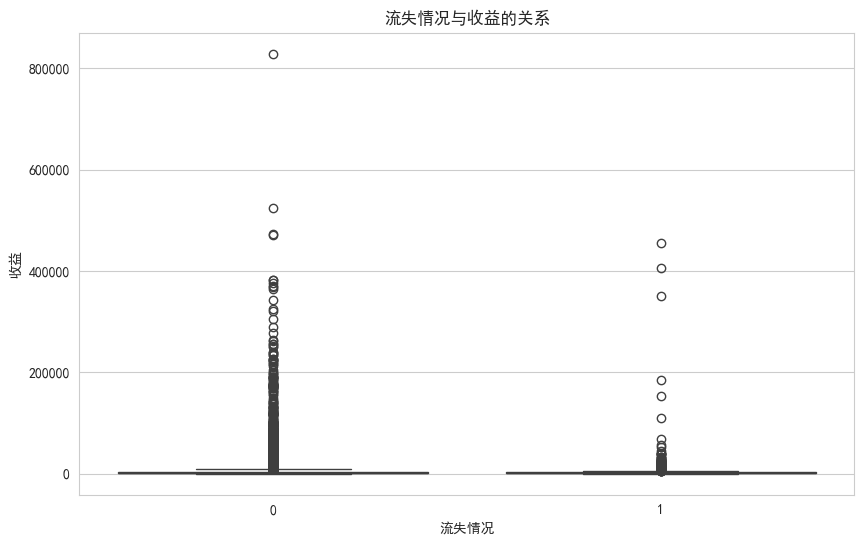

In [9]:
# 流失情况与运单数的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='流失情况', y='运单数', data=df)
plt.title('流失情况与运单数的关系')
plt.xlabel('流失情况')
plt.ylabel('运单数')
plt.show()

# 流失情况与收益的关系
plt.figure(figsize=(10, 6))
sns.boxplot(x='流失情况', y='收益', data=df)
plt.title('流失情况与收益的关系')
plt.xlabel('流失情况')
plt.ylabel('收益')
plt.show()


### i.不同服务类型的分布

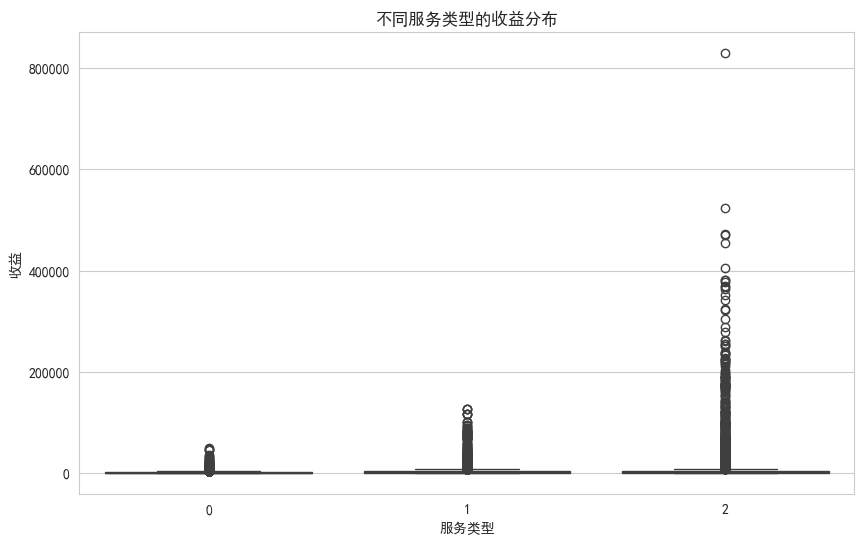

In [10]:
# 不同服务类型的收益分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='服务类型', y='收益', data=df)
plt.title('不同服务类型的收益分布')
plt.xlabel('服务类型')
plt.ylabel('收益')
plt.show()


### 不同结算方式的收益对比

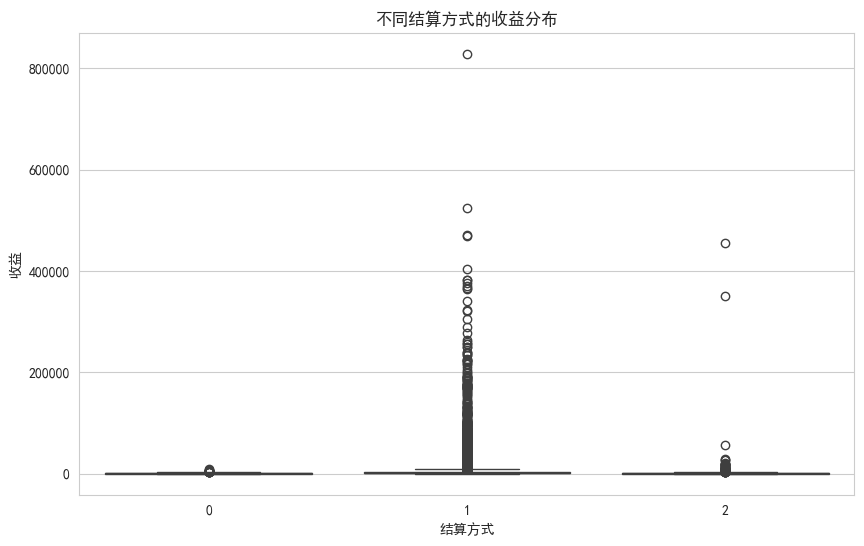

In [11]:
# 按结算方式展示收益分布
plt.figure(figsize=(10, 6))
sns.boxplot(x='结算方式', y='收益', data=df)
plt.title('不同结算方式的收益分布')
plt.xlabel('结算方式')
plt.ylabel('收益')
plt.show()
